Chapter 13: The Road to Succession: Transition Matrices

1. What is the stationary state distrubution of this population?
2. What is the probability that a randomly selected individual from this population at year 50 is a Maple?

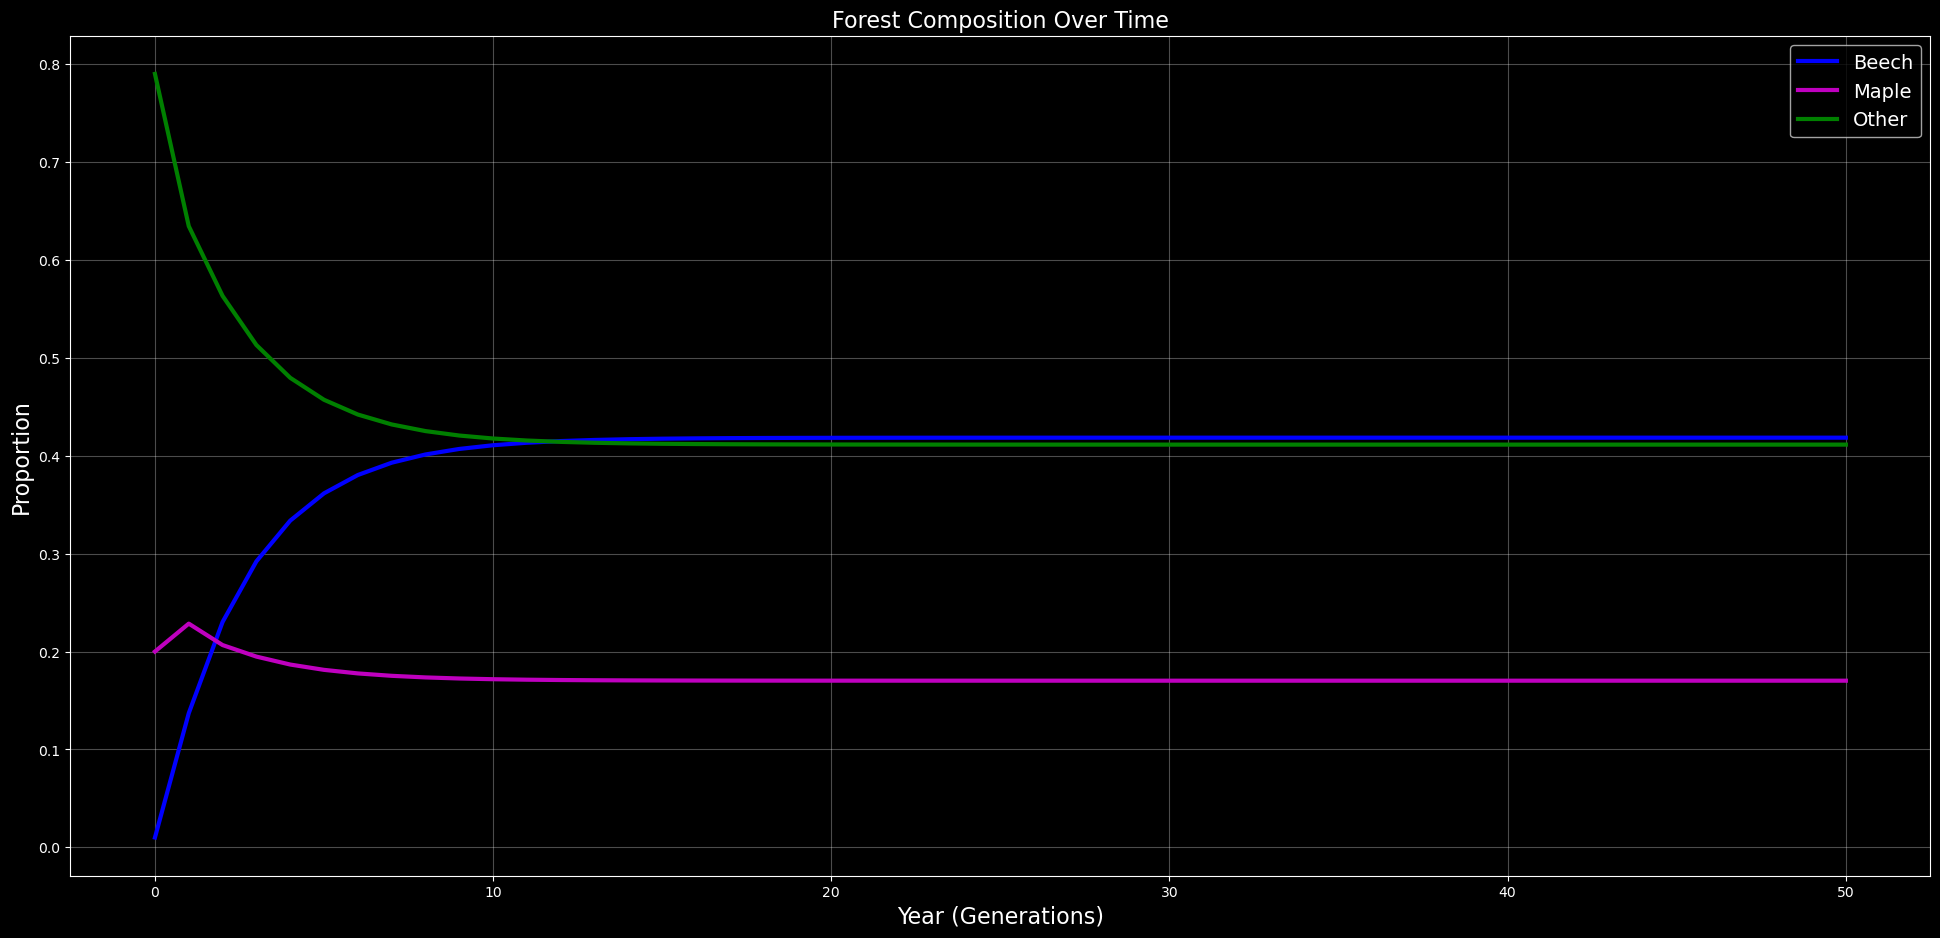

In [ ]:
# Import the packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

# Transition matrix A
A = np.array([
    [0.80, 0.25, 0.10],# Beech next
    [0.10, 0.15, 0.25],# Maple next
    [0.10, 0.60, 0.65],# Other next
], dtype=float)

# This is the initial counts vector (B, M, O)
n0 = np.array([1.0, 20.0, 79.0])

# Stationary distribution 
eigvals, eigvecs = np.linalg.eig(A)
idx = np.argmin(np.abs(eigvals - 1.0))
pi = np.real(eigvecs[:, idx])
pi = np.clip(pi / np.sum(pi), 0, None)

#Simulate population for 50 generations 
years = 50
n = np.zeros((3, years + 1))
n[:, 0] = n0

for t in range(years):
    n[:, t + 1] = A @ n[:, t] 

# Normalize to proportions
p = n / np.sum(n, axis=0)



# The plotting setting
style.use('dark_background')
plt.figure(figsize=(24, 24))
# Doing the plotting
plt.subplot(2, 1, 1)
plt.plot(range(years + 1), p[0], 'b-', linewidth=3, label='Beech')
plt.plot(range(years + 1), p[1], 'm-', linewidth=3, label='Maple')
plt.plot(range(years + 1), p[2], 'g-', linewidth=3, label='Other')
plt.title('Forest Composition Over Time', fontsize=16)
plt.xlabel('Year (Generations)', fontsize=16)
plt.ylabel('Proportion', fontsize=16)
plt.legend(fontsize=14)
plt.grid(True, alpha=0.3)



Chapter 14: A Pair of Populations: Absorption

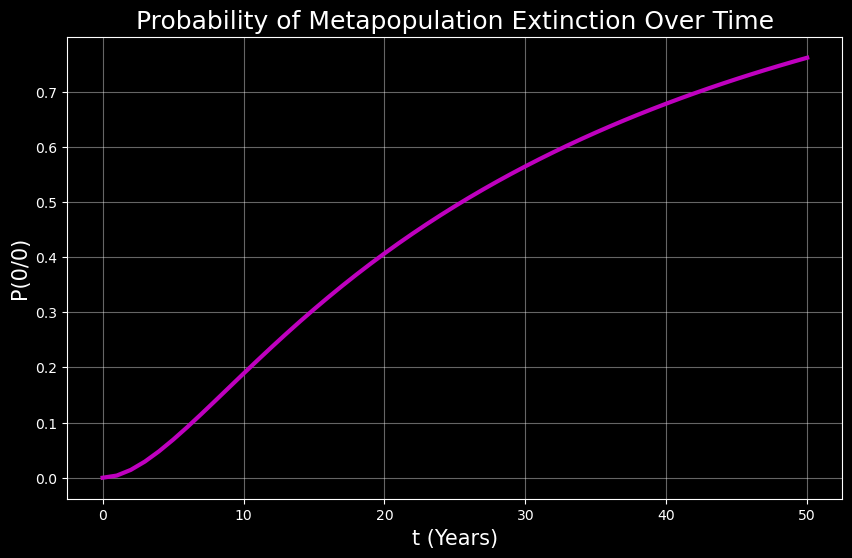

Probability of both populations extinct after 50 years: 76.13%


In [17]:
# what is the proability that both populations will go extinct after 50 years

# Import the packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style


# Parameters
eA = 0.03 # extinction prob (large patch)
eB = 0.13 # extinction prob (small patch)
cA = 0.02 # colonization from B to A
cB = 0.02 # colonization from A to B

# Transition matrix 
# Order of states: [0/0, 1/0, 0/1, 1/1]
A = np.array([
    [1,          eA*(1-cB),       (1-cA)*eB,      eA*eB],
    [0,  (1-eA)*(1-cB),           cA*eB,   (1-eA)*eB],
    [0,          eA*cB,   (1-cA)*(1-eB),    eA*(1-eB)],
    [0,  (1-eA)*cB,        cA*(1-eB), (1-eA)*(1-eB)]
])

# Initial state vector 
p = np.array([0, 0, 0, 1], dtype=float)

# Project over 50 years
years = 50
p_history = np.zeros((4, years+1))
p_history[:, 0] = p

for t in range(years):
    p = A @ p
    p_history[:, t+1] = p

# Extract probability of extinction 
prob_extinct = p_history[0, :] 

# Plot settings
style.use('dark_background')
plt.figure(figsize=(10,6))

# Plotting 
plt.plot(range(years+1), prob_extinct, 'm-', linewidth=3)
plt.title('Probability of Metapopulation Extinction Over Time', fontsize=18)
plt.xlabel('t (Years)', fontsize=15)
plt.ylabel('P(0/0)', fontsize=15)
plt.grid(alpha=0.4)
plt.show()

# Probability of extinction after 50 years
prob_50 = prob_extinct[-1]
print(f"Probability of both populations extinct after 50 years: {prob_50*100:.2f}%")
